## Importar librerias y herramientas

In [4]:
#Imports y herramientas varias

import matplotlib.pyplot as plt
import numpy as np
import pandas as pnd
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_classif
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import itertools

## Importar datos originales y datos a predecir

In [5]:
#Importar datos originales
path = "Datos/"

clientes = pnd.read_excel(path + "CREDITRISK_RAW.xlsx")

#Importar datos a predecir
clientes_nuevos = pnd.read_excel(path + "CREDITRISK_SCORE.xlsx")

## Explorar atributos y sus tipos

In [3]:
#Exploración de atributos
for key in clientes.keys():
    print( "Atributo:", key)
    print( "\tTipo:", clientes[key].dtype)

Atributo: ID
	Tipo: int64
Atributo: GENERO
	Tipo: object
Atributo: RENTA
	Tipo: float64
Atributo: EDAD
	Tipo: float64
Atributo: NIV_EDUC
	Tipo: object
Atributo: E_CIVIL
	Tipo: object
Atributo: COD_OFI
	Tipo: int64
Atributo: COD_COM
	Tipo: object
Atributo: CIUDAD
	Tipo: object
Atributo: Crédito_1
	Tipo: int64
Atributo: Crédito_2
	Tipo: int64
Atributo: Crédito_3
	Tipo: float64
Atributo: Crédito_4
	Tipo: int64
Atributo: Monto solicitado
	Tipo: float64
Atributo: Días de Mora
	Tipo: int64
Atributo: Monto Deuda Promedio
	Tipo: int64
Atributo: Número de meses inactivo
	Tipo: int64
Atributo: numero de cuotas
	Tipo: int64
Atributo: Aval
	Tipo: object
Atributo: PAGA
	Tipo: object


## Extraccion de clientes con datos en blanco (null)

In [6]:
#Extracción de clientes con algún dato en blanco
empty_attribute_clients = clientes[clientes.isnull().any(axis=1)]
clean_clients = clientes[~clientes.isnull().any(axis=1)]

del clientes_nuevos['PAGA']
empty_attribute_clients_new = clientes_nuevos[clientes_nuevos.isnull().any(axis=1)]
clean_clients_new = clientes_nuevos[~clientes_nuevos.isnull().any(axis=1)]
clientes_nuevos=clean_clients_new.copy()

print('Cantidad de clientes con un atributo vacio: ',len(empty_attribute_clients),'\n')
print('Cantidad de clientes a predecir, con un atributo vacio: ',len(empty_attribute_clients_new),'\n')

Cantidad de clientes con un atributo vacio:  54 

Cantidad de clientes a predecir, con un atributo vacio:  31 



## Transformacion de variables categoricas a columnas numericas

In [7]:
del clean_clients['ID']
del clean_clients_new['ID']

for value in clean_clients['E_CIVIL'].unique():
    clean_clients[value.strip()] = clean_clients['E_CIVIL'].apply(lambda x: 1 if x == value else 0)
    clean_clients_new[value.strip()] = clean_clients_new['E_CIVIL'].apply(lambda x: 1 if x == value else 0)
    
del clean_clients['E_CIVIL']
del clean_clients_new['E_CIVIL']
    
for value in clean_clients['NIV_EDUC'].unique():
    clean_clients[value.strip()] = clean_clients['NIV_EDUC'].apply(lambda x: 1 if x == value else 0)
    clean_clients_new[value.strip()] = clean_clients_new['NIV_EDUC'].apply(lambda x: 1 if x == value else 0)
    
del clean_clients['NIV_EDUC']
del clean_clients_new['NIV_EDUC']


#clean_clients = clean_clients[~(clean_clients[''] == 1)]
#clean_clients_new = clean_clients_new[~(clean_clients_new[''] == 1)]

print(len(clean_clients_new))
del clean_clients['']
del clean_clients_new['']

del clean_clients['CIUDAD']
del clean_clients_new['CIUDAD']

del clean_clients['COD_OFI']
del clean_clients_new['COD_OFI']

del clean_clients['COD_COM']
del clean_clients_new['COD_COM']

llaves = clean_clients.keys()
llaves_dic = {}
for llave in llaves:
    
    if clean_clients[llave].dtype == 'int64' or clean_clients[llave].dtype == 'float64':
        continue
    if llave in ['ID']:
        continue
    values = clean_clients[llave].unique()
    dic = {}
    for i in range(len(values)):
        dic[values[i]] = i
    llaves_dic[llave] = dic
    clean_clients[llave] = clean_clients[llave].apply(lambda x: dic[x])

    
llaves_new = clean_clients_new.keys()

for llave in llaves_new:
    
    if clean_clients_new[llave].dtype == 'int64' or clean_clients_new[llave].dtype == 'float64':
        continue
    if llave in ['ID']:
        continue
    values_new = clean_clients_new[llave].unique()
    dic_new = llaves_dic[llave]
    clean_clients_new[llave] = clean_clients_new[llave].apply(lambda x: dic_new[x])

#Paga: 0, No Paga: 1

C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1169


C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
clean_clients

,GENERO,RENTA,EDAD,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Monto solicitado,Días de Mora,Monto Deuda Promedio,...,PAGA,CAS,SEP,SOL,VIU,MED,TEC,UNV,EUN,BAS
0,0,463000.0,55.0,0,-4030,0.0,292673,142.0,0,81,...,0,1,0,0,0,1,0,0,0,0
1,0,1200000.0,59.0,0,0,27797549.0,0,16.0,0,34519,...,1,1,0,0,0,1,0,0,0,0
2,0,526000.0,49.0,0,750000,0.0,0,0.0,0,8016,...,1,0,1,0,0,0,1,0,0,0
3,1,1500000.0,47.0,0,976444,0.0,0,13.0,10,25323,...,0,0,1,0,0,0,0,1,0,0
4,1,2600000.0,41.0,0,115440,0.0,4500000,7960.0,14,4566,...,1,1,0,0,0,0,0,1,0,0
5,0,1250000.0,30.0,0,799000,0.0,0,147.0,0,0,...,1,0,0,1,0,1,0,0,0,0
6,1,724000.0,47.0,0,500000,0.0,1963,0.0,0,2,...,0,1,0,0,0,0,0,1,0,0
7,1,1196000.0,53.0,0,0,0.0,0,0.0,4,0,...,0,1,0,0,0,0,0,1,0,0
8,0,510000.0,39.0,0,1050000,0.0,279914,305.0,0,0,...,1,1,0,0,0,1,0,0,0,0
9,1,685000.0,51.0,0,164272,0.0,99401,114.0,0,1152,...,0,1,0,0,0,0,0,1,0,0


In [9]:
print(clean_clients.keys())
print(clean_clients_new.keys())

Index(['GENERO', 'RENTA', 'EDAD', 'Crédito_1', 'Crédito_2', 'Crédito_3',
       'Crédito_4', 'Monto solicitado', 'Días de Mora', 'Monto Deuda Promedio',
       'Número de meses inactivo', 'numero de cuotas', 'Aval', 'PAGA', 'CAS',
       'SEP', 'SOL', 'VIU', 'MED', 'TEC', 'UNV', 'EUN', 'BAS'],
      dtype='object')
Index(['GENERO', 'RENTA', 'EDAD', 'Crédito_1', 'Crédito_2', 'Crédito_3',
       'Crédito_4', 'Monto solicitado', 'Días de Mora', 'Monto Deuda Promedio',
       'Número de meses inactivo', 'numero de cuotas', 'Aval', 'CAS', 'SEP',
       'SOL', 'VIU', 'MED', 'TEC', 'UNV', 'EUN', 'BAS'],
      dtype='object')


## Guardar dataset limpio en nuevo archivo excel para su posterior análisis

In [10]:
#Guardar dataset limpio en nuevo archivo excel para análisis con tableau o excel
clean_clients.to_excel(path + "limpio.xlsx")

## Definicion de variables X e y, normalizacion de x, primeros clasificadores

In [11]:
#Definicion de X e y
clients_copy = clean_clients.copy()

y = clients_copy['PAGA']
del clients_copy['PAGA']

X = clients_copy.copy()

In [12]:
#Normalización de los datos
scaler=StandardScaler()
scaler.fit(X)
X_norm=pnd.DataFrame(data=scaler.transform(X), columns=X.keys())

In [13]:
clf = tree.DecisionTreeClassifier()

cross_val_score(clf, X_norm, y, cv=5)

array([0.86191537, 0.87276786, 0.89285714, 0.85714286, 0.88143177])

## Importancia de atributos mediante random forest y mutual information

In [14]:
clf = RandomForestClassifier(criterion='entropy')
clf.fit(X_norm, y)

print("Random forest:\n")
for i in range(len(X.keys())):
    print(X.keys()[i], ':', clf.feature_importances_[i])
    

Random forest:

GENERO : 0.10195501625491468
RENTA : 0.08908154124565291
EDAD : 0.23377832445764976
Crédito_1 : 0.01727160211649161
Crédito_2 : 0.0562303370157322
Crédito_3 : 0.006086828398248618
Crédito_4 : 0.053861082173840634
Monto solicitado : 0.0620739389950868
Días de Mora : 0.022469446976196027
Monto Deuda Promedio : 0.04399851869742421
Número de meses inactivo : 0.06983189347536628
numero de cuotas : 0.057729177613581026
Aval : 0.016403714664454585
CAS : 0.02338434464862303
SEP : 0.0021238308997567432
SOL : 0.011928654144967275
VIU : 0.0042001305770020085
MED : 0.01697709316833395
TEC : 0.03320064600185029
UNV : 0.0755401726718357
EUN : 0.00039747129319503345
BAS : 0.0014762345097965683


In [15]:
mutual_info=mutual_info_classif(X_norm, y)

print('Mutual information : \n')
for i in range(len(X.keys())):
    print(X.keys()[i], ':', mutual_info[i])

Mutual information : 

GENERO : 0.13490086827974923
RENTA : 0.04105737427549161
EDAD : 0.1970070285177663
Crédito_1 : 0.048232663916760066
Crédito_2 : 0.0692772884727273
Crédito_3 : 0.011700732694080784
Crédito_4 : 0.06835170938457624
Monto solicitado : 0.08524254368862039
Días de Mora : 0.011998175901136054
Monto Deuda Promedio : 0.06646316258302432
Número de meses inactivo : 0.09707148365040674
numero de cuotas : 0.005262411679334944
Aval : 0.015912026003654045
CAS : 0.048302152834812206
SEP : 0.0
SOL : 0.056183462718708777
VIU : 0.02793083732187207
MED : 0.00939328556750274
TEC : 0.09842706665410672
UNV : 0.12517630896681653
EUN : 0.0
BAS : 0.0019443973219366306


## Métodos de clustering

### Clustering jerarquico aglomerativo

In [14]:
#Clustering aglomerativo jerarquico
#ward, complete
matrix = linkage(X_norm, method='ward')

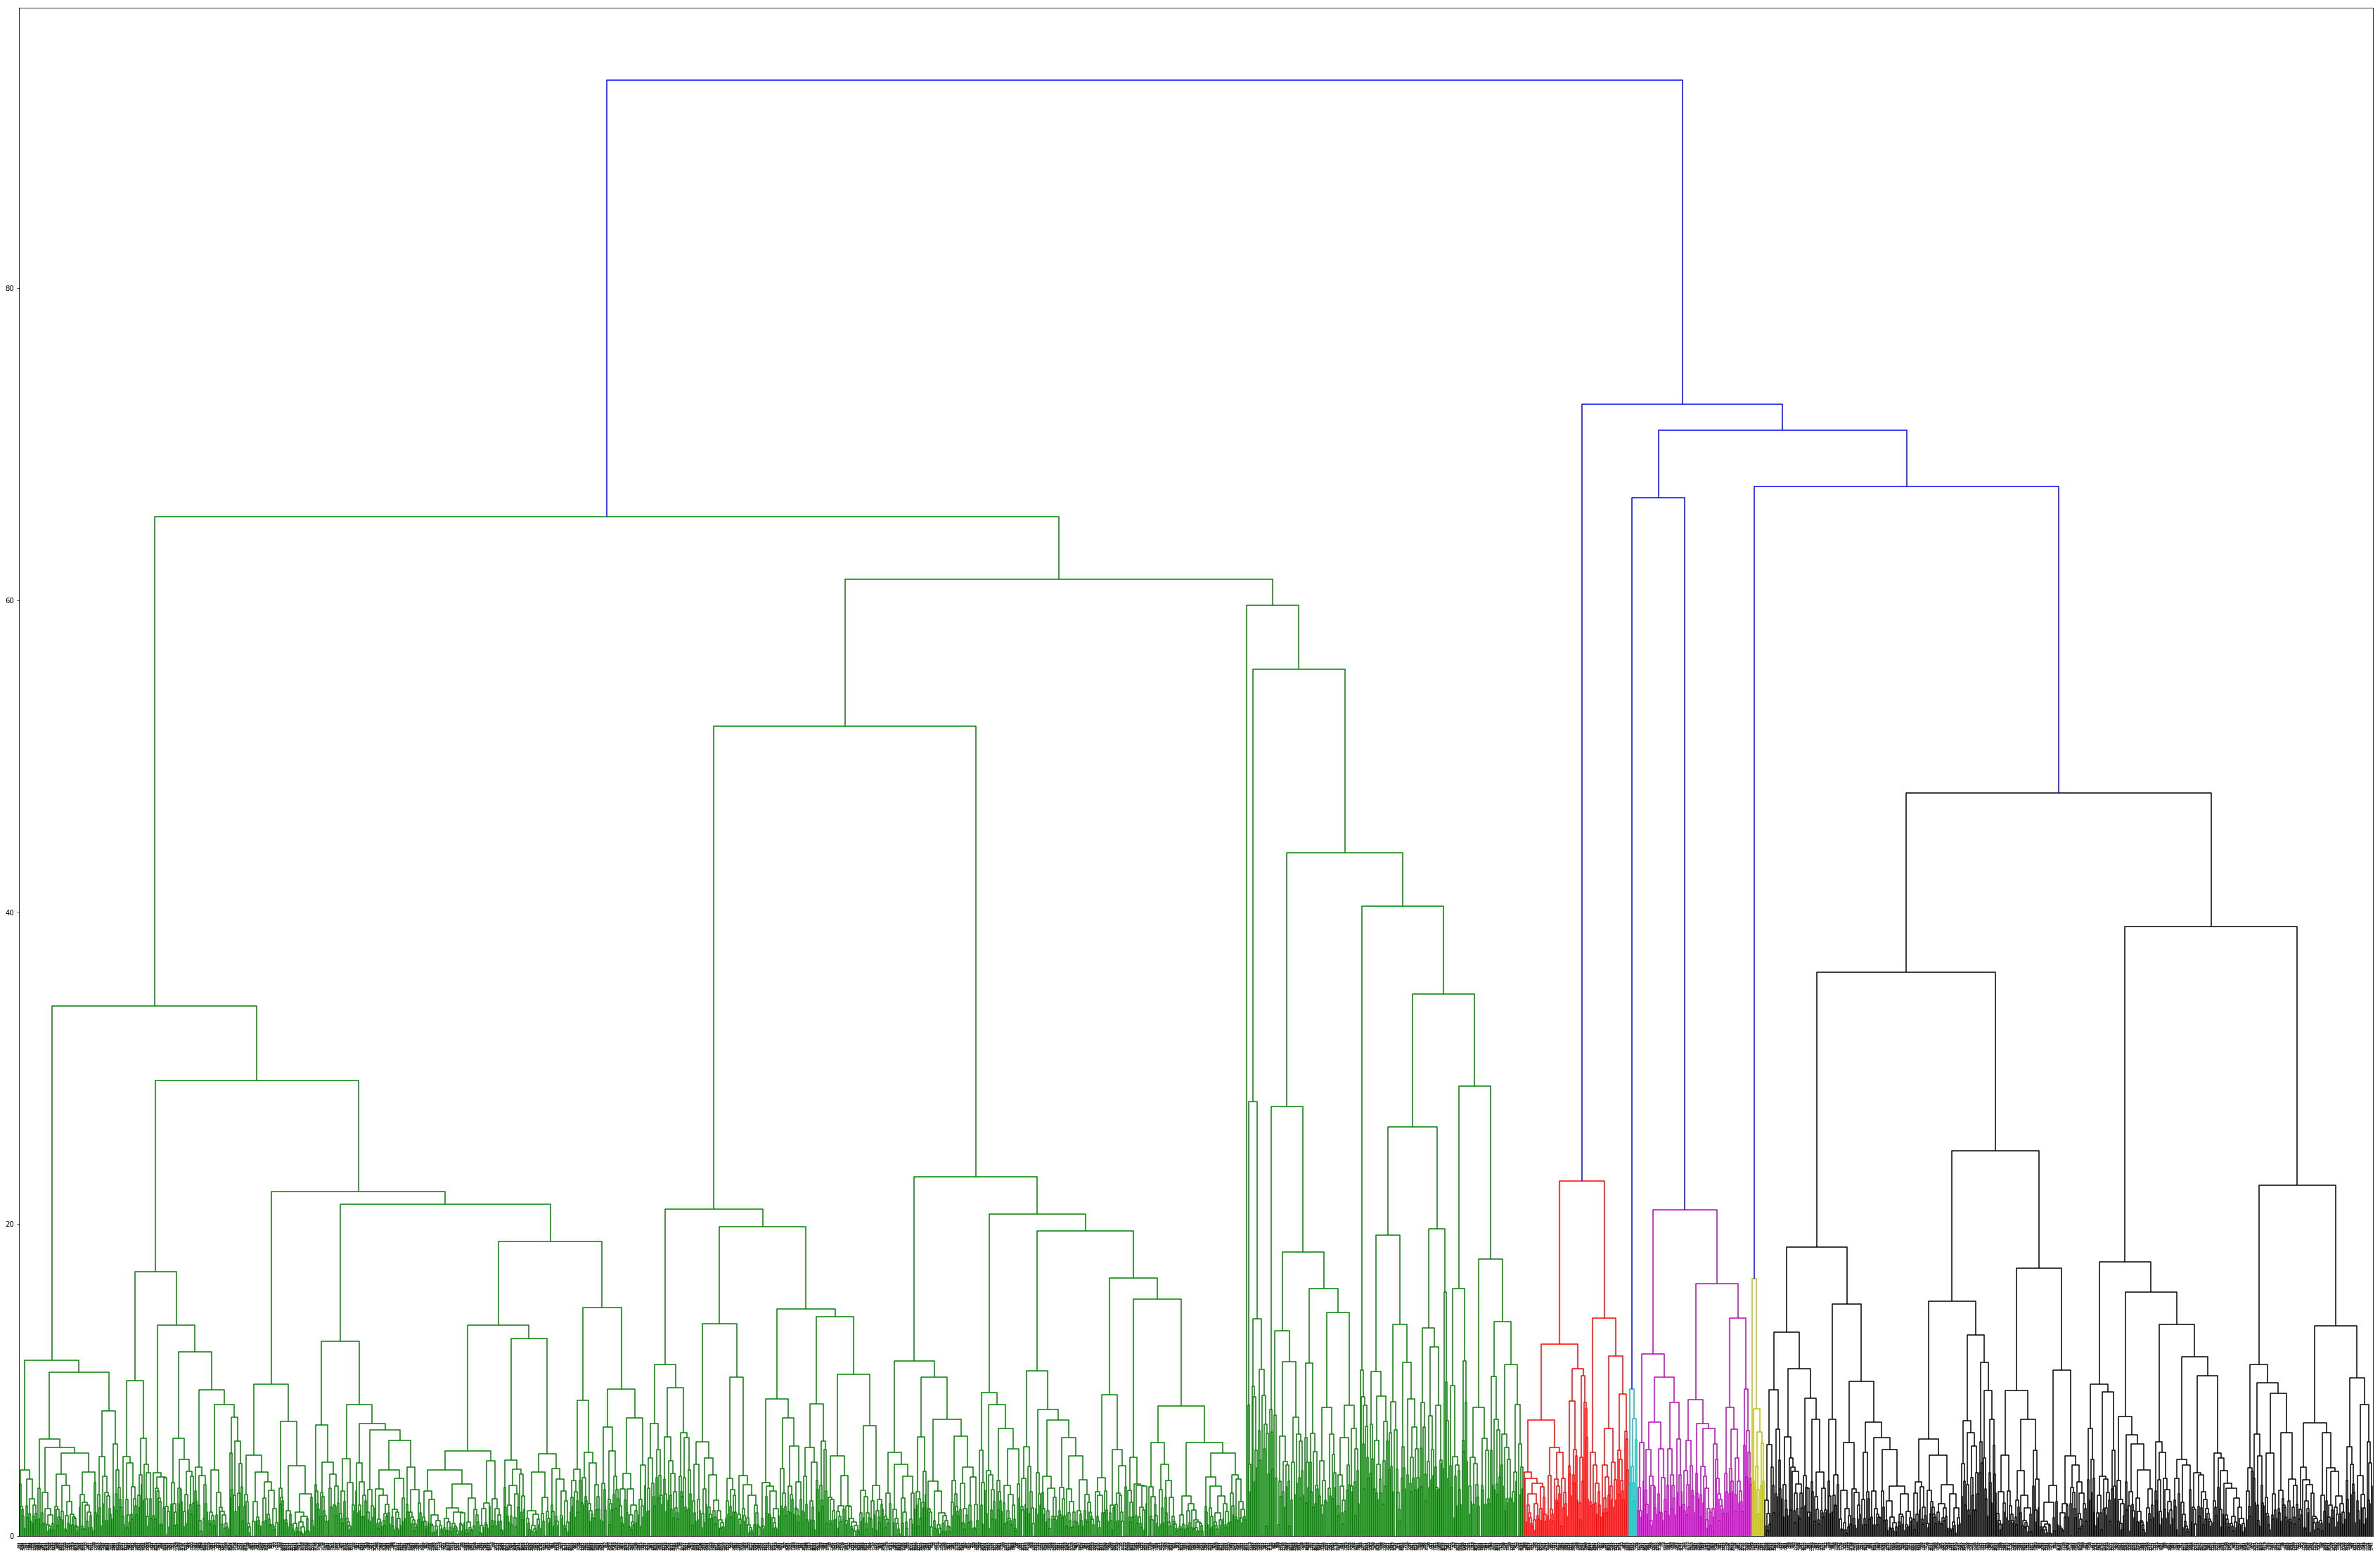

In [15]:
#Grafico del dendograma
plt.figure(figsize=(60, 40))
dendrogram(matrix)
plt.show()

In [16]:
#Formacion de los clusters a traves del clustering jerarquico aglomerativo
num_clusters=4
labels = pnd.DataFrame(fcluster(matrix, num_clusters, criterion='maxclust'))
for i in range(len(labels)):
    print(X.axes[0][i],labels[0][i])

0 1
1 1
2 3
3 3
4 1
5 4
6 1
7 1
8 1
9 1
10 4
11 1
12 1
13 1
14 1
15 4
16 1
17 1
18 1
19 1
20 1
21 4
22 4
23 1
24 3
25 1
26 1
27 4
28 4
29 1
30 4
31 4
32 1
33 4
34 3
35 1
36 1
37 1
38 4
39 4
40 1
41 1
42 1
43 1
44 4
45 3
46 4
47 4
48 2
49 4
50 1
51 3
52 4
53 4
54 1
55 1
56 1
57 4
58 2
59 1
60 1
61 3
62 1
63 1
64 1
65 1
66 3
67 1
68 1
69 4
70 1
71 4
72 1
73 4
74 4
75 4
76 1
77 4
78 1
79 3
80 1
81 1
82 4
83 2
84 4
85 1
86 1
87 4
88 3
89 1
90 1
91 4
92 1
93 4
94 1
95 3
96 1
97 1
98 1
99 4
100 1
101 1
103 1
104 1
105 4
106 4
107 1
108 4
109 1
110 4
111 3
112 2
113 2
114 1
115 4
116 1
117 4
118 4
119 1
120 4
121 2
122 1
123 4
124 1
125 1
126 1
127 1
128 1
129 1
130 1
131 1
132 1
133 1
134 1
135 4
136 4
137 4
138 4
139 1
140 4
141 1
142 1
143 1
144 4
145 1
146 1
147 1
148 1
149 4
150 1
151 4
152 1
153 4
154 1
155 1
156 1
157 1
158 4
159 1
160 4
161 1
162 2
163 1
164 4
165 1
166 1
167 1
168 1
169 4
170 4
171 1
172 4
173 1
174 1
175 1
176 1
177 1
178 1
179 4
180 4
181 4
183 1
184 4
185 1
186 1


In [17]:
#Reduccion de dimensionalidad de los datos mediante t-distributed Stochastic Neighbor Embedding.
X_embedded = TSNE(n_components=2).fit_transform(X_norm)

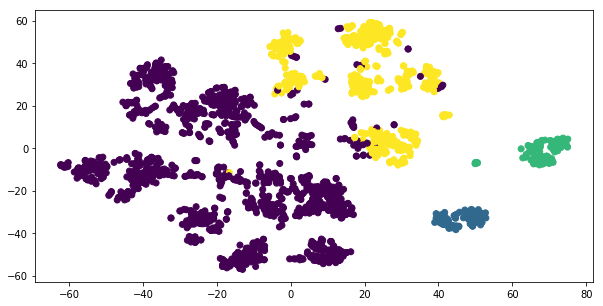

In [18]:
#Grafico de los datos en 2d con las etiquetas
plt.figure(figsize=(10, 5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels[0]) #Se agregan los labels de los clusters
plt.show()

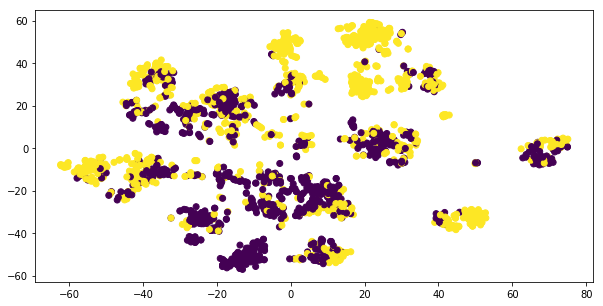

In [19]:
#Grafico de los datos en 2d con la función objetivo como label
plt.figure(figsize=(10, 5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y) #Se agregan los labels de los clusters
plt.show()

### K-Means

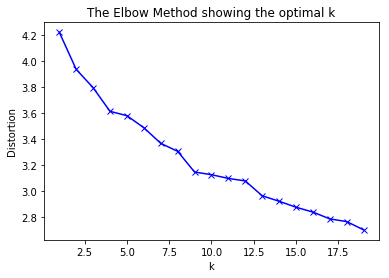

In [20]:
#Kmeans
# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_norm)
    kmeanModel.fit(X_norm)
    distortions.append(sum(np.min(cdist(X_norm, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_norm.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
#Clusters con KMeans
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X_norm)

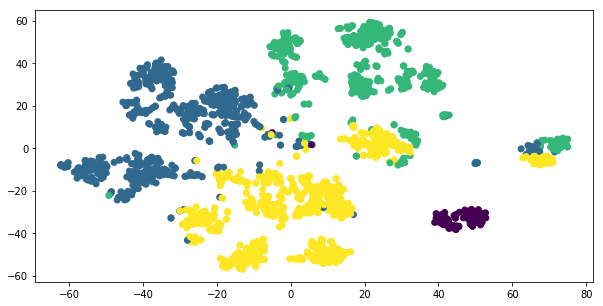

In [22]:
#etiquetas de KMeans
plt.figure(figsize=(10, 5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=cluster_labels) #Se agregan los labels de los clusters
plt.show()

In [23]:
cluster_res = clean_clients.copy()
cluster_res['labels'] = labels.copy()

In [24]:
cluster_1 = cluster_res[cluster_res['labels'] == 1]
cluster_2 = cluster_res[cluster_res['labels'] == 2]
cluster_3 = cluster_res[cluster_res['labels'] == 3]
cluster_4 = cluster_res[cluster_res['labels'] == 4]

In [25]:
print(len(cluster_res), len(cluster_1) + len(cluster_2) + len(cluster_3) + len(cluster_4))

2240 2186


In [26]:
#Guardar dataset limpio en nuevo archivo excel para análisis con tableau o excel
cluster_res.to_excel(path + "limpio_labels.xlsx")

In [27]:
cluster_none = cluster_res[(cluster_res['labels'] != 1) & (cluster_res['labels'] != 3) & (cluster_res['labels'] != 2)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B6D77447F0>]],
      dtype=object)

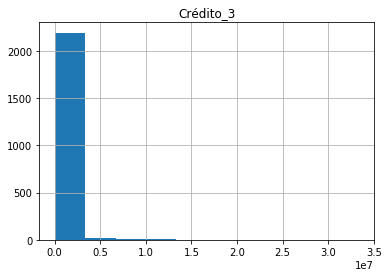

In [28]:
cluster_res.hist(u'Crédito_3')

## Métodos de aprendizaje supervisado

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):

    if normalize:
        cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],2)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Árboles de decision + Regresión logística

### Support Vector Machine (SVM)

In [17]:
#SVM Code Here

#Buscar parametros mediante grid search

C_svm=[1,10,100,1000]
gamma_svm=[0.0001,0.001,0.01,0.1]

for i in C_svm:
    for j in gamma_svm:
        print('C: ', i, ' gamma: ', j)
        clf_svm = svm.SVC(C= i,kernel= 'rbf',gamma = j)
        predicted_svm = cross_val_predict(clf_svm, X_norm, y, cv=10)
        target_names=['Paga', 'No Paga']
        print('SVM classifier')
        print(classification_report(y, predicted_svm, target_names=target_names))

C:  1  gamma:  0.0001
SVM classifier
             precision    recall  f1-score   support

       Paga       0.74      0.87      0.80      1099
    No Paga       0.85      0.70      0.77      1141

avg / total       0.79      0.78      0.78      2240

C:  1  gamma:  0.001
SVM classifier
             precision    recall  f1-score   support

       Paga       0.79      0.86      0.82      1099
    No Paga       0.85      0.78      0.81      1141

avg / total       0.82      0.82      0.82      2240

C:  1  gamma:  0.01
SVM classifier
             precision    recall  f1-score   support

       Paga       0.81      0.87      0.84      1099
    No Paga       0.86      0.81      0.84      1141

avg / total       0.84      0.84      0.84      2240

C:  1  gamma:  0.1
SVM classifier
             precision    recall  f1-score   support

       Paga       0.86      0.84      0.85      1099
    No Paga       0.85      0.86      0.86      1141

avg / total       0.85      0.85      0.85      2240

In [18]:
#Evaluacion del svm con los mejores parametros
clf_svm = svm.SVC(C= 10,kernel= 'rbf',gamma = 0.01) 
predicted_svm = cross_val_predict(clf_svm, X_norm, y, cv=10)
target_names=['Paga', 'No paga']
print('Best SVM classifier')
print(classification_report(y, predicted_svm, target_names=target_names))

Best SVM classifier
             precision    recall  f1-score   support

       Paga       0.83      0.87      0.85      1099
    No paga       0.87      0.83      0.85      1141

avg / total       0.85      0.85      0.85      2240



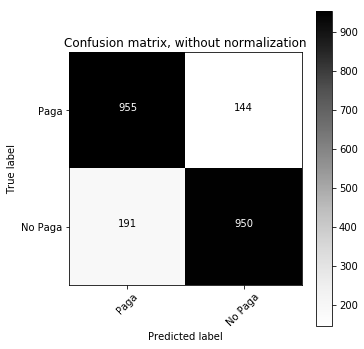

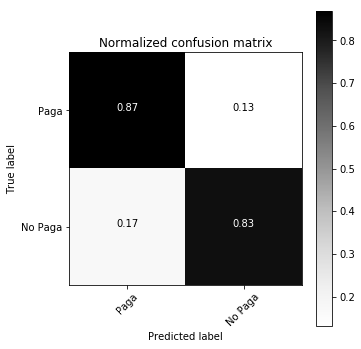

In [19]:
#Matriz de confusion svm

cnf_matrix_svm = confusion_matrix(y, predicted_svm)
np.set_printoptions(precision=2)

plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix_svm, classes=["Paga", "No Paga"], title='Confusion matrix, without normalization')

#Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix_svm, classes=["Paga", "No Paga"], normalize=True, title='Normalized confusion matrix')

plt.show()

### Multilayer Perceptron Network (MLP)

In [20]:
#Parametros de la red neuronal y entrenamiento de la red

mlp = MLPClassifier(solver='adam', alpha=1e-4,learning_rate='constant', learning_rate_init=1e-3,
                     activation='logistic',max_iter=500,hidden_layer_sizes=(50,10), random_state=1)

predicted_mlp = cross_val_predict(mlp,X_norm,y,cv=10)

print("Training set score")
target_names=['Paga', 'No Paga']
print(classification_report(y,predicted_mlp,target_names=target_names))

Training set score
             precision    recall  f1-score   support

       Paga       0.80      0.85      0.82      1099
    No Paga       0.85      0.79      0.82      1141

avg / total       0.82      0.82      0.82      2240



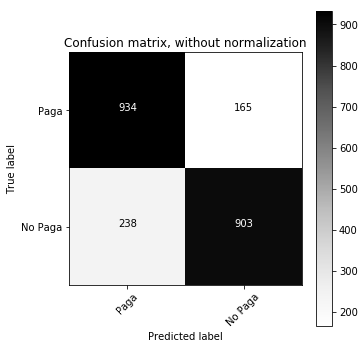

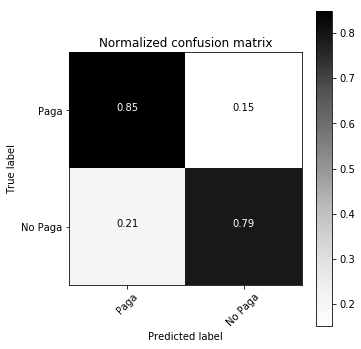

In [21]:
#Matriz de confusion MLP

cnf_matrix_mlp = confusion_matrix(y, predicted_mlp)
np.set_printoptions(precision=2)

plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix_mlp, classes=["Paga", "No Paga"], title='Confusion matrix, without normalization')

#Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix_mlp, classes=["Paga", "No Paga"], normalize=True, title='Normalized confusion matrix')

plt.show()

## Prediccion en datos nuevos

In [23]:
clean_clients_new

,GENERO,RENTA,EDAD,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Monto solicitado,Días de Mora,Monto Deuda Promedio,...,Aval,CAS,SEP,SOL,VIU,MED,TEC,UNV,EUN,BAS
0,0,500000.0,49.0,0,128846,0.0,188588,187.0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,75000.0,42.0,0,600000,0.0,0,20.0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,804000.0,29.0,0,1500000,0.0,43430,0.0,12,0,...,0,1,0,0,0,0,0,1,0,0
3,1,45500.0,45.0,2223208,1528,0.0,0,2657.0,0,496,...,0,1,0,0,0,1,0,0,0,0
4,1,4820000.0,41.0,0,434897,0.0,352646,0.0,0,0,...,1,1,0,0,0,0,0,1,0,0
5,1,7500000.0,43.0,0,500000,0.0,372944,0.0,3,0,...,1,1,0,0,0,0,0,1,0,0
6,1,75000.0,43.0,0,1299962,0.0,0,264.0,0,0,...,1,1,0,0,0,0,0,1,0,0
7,1,60000.0,47.0,0,780445,0.0,1922472,16.0,0,19351,...,0,1,0,0,0,0,0,1,0,0
8,1,480000.0,34.0,0,190181,0.0,0,46.0,0,0,...,0,1,0,0,0,1,0,0,0,0
9,1,1197000.0,39.0,0,250000,0.0,1182,3541.0,22,263,...,0,1,0,0,0,1,0,0,0,0


In [24]:
#Normalizacion de los datos
X_norm_new=pnd.DataFrame(data=scaler.transform(clean_clients_new), columns=clean_clients_new.keys())

#Entrenamiento del clasificador y evaluacion en los datos nuevos
clf_svm.fit(X_norm, y)
y_predicted_new=clf_svm.predict(X_norm_new)

predicted_label=[]
for i in range(len(y_predicted_new)):
    if y_predicted_new[i]==0:
        predicted_label.append('PAGA')
    else:
        predicted_label.append('NO PAGA')
        
clientes_nuevos['PAGA']=predicted_label

In [25]:
#Guardar dataset limpio en nuevo archivo excel para análisis con tableau o excel
clientes_nuevos.to_excel(path + "CREDITRISK_SCORE_predicted.xlsx")

## Ver desempeño a traves de graficos (Al ojo)

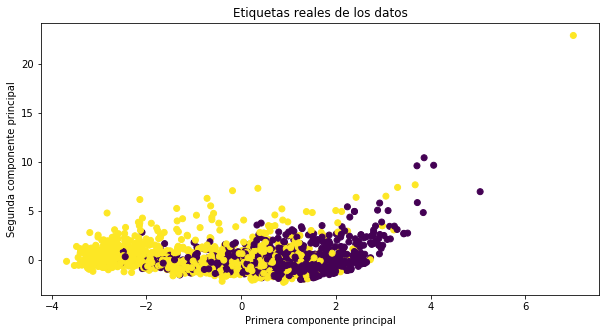

In [26]:
#Ground truth: datos y etiquetas reales
pca_datos=PCA(n_components=2)
pca_datos.fit(X_norm)
X_pca=pca_datos.transform(X_norm)

plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y) #Se agregan los labels de los clusters
plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente principal')
plt.title('Etiquetas reales de los datos')
plt.show()

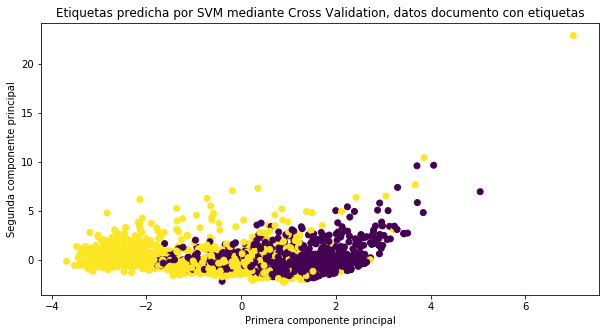

In [27]:
#Predicho por SVM
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_svm) #Se agregan los labels de los clusters
plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente principal')
plt.title('Etiquetas predicha por SVM mediante Cross Validation, datos documento con etiquetas')
plt.show()

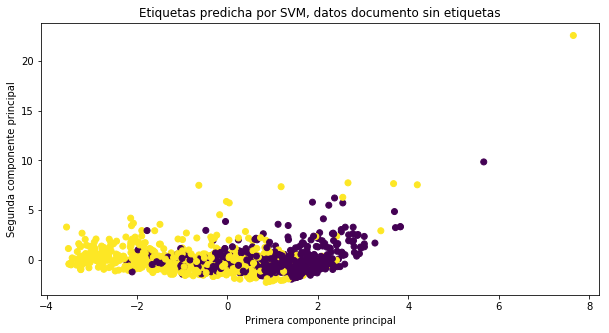

In [28]:
#Predicho por SVM
X_pca_new=pca_datos.transform(X_norm_new)

plt.figure(figsize=(10, 5))
plt.scatter(X_pca_new[:, 0], X_pca_new[:, 1], c=y_predicted_new) #Se agregan los labels de los clusters
plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente principal')
plt.title('Etiquetas predicha por SVM, datos documento sin etiquetas')
plt.show()